In [ ]:
%pip install -q -r requirements.txt

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn as sns
from IPython.display import display

pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
try:
    games_pd = pd.read_csv('/datasets/games.csv')
except:
    games_pd = pd.read_csv('./games.csv')

### Предобработка данных

#### Общая информация входных данных

In [3]:
def df_info(df, n_head=3):  
    display(df.head(3))
    print('shape: \n',df.shape, '\n')
    print('info: \n', df.info(), '\n')

In [4]:
df_info(games_pd, 1)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E


shape: 
 (16715, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
info: 
 None 



#### Переименование колонок

In [5]:
games_pd.columns = games_pd.columns.str.lower()

games_pd.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Замена типов данных

In [6]:
games_pd.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [7]:
games_pd.year_of_release = games_pd.year_of_release.astype('Int64')

In [8]:
games_pd.year_of_release.head(1)

0    2006
Name: year_of_release, dtype: Int64

##### Вывод
заменили тип со значением года выпуска с object на int
произвели приведение всех колонок к нижнему регистру

#### Заполнение пропусков

In [9]:
games_pd.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
games_pd.loc[games_pd.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


In [11]:
games_pd = games_pd.query("name.isna()==False", engine='python')

In [12]:
# подлежит уточнению = tbd
games_pd.loc[games_pd.user_score == 'tbd'].head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,nan,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,nan,tbd,T


In [13]:
games_pd['user_score'] = games_pd['user_score'].replace('tbd', None).astype(float)

In [14]:
# если не заполнен скор, то как правило оставшиеся скоры и рейтинг тоже пустые
games_pd.loc[games_pd.user_score.isna()].isna().sum()

name                  0
platform              0
year_of_release     118
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7348
user_score         7953
rating             6651
dtype: int64

In [15]:
critic_score_year_med = games_pd.groupby('year_of_release')['critic_score'].agg(['median'])
critic_score_year_med.head(1)

,median
year_of_release,
1980,nan


In [16]:
user_score_year_med = games_pd.groupby('year_of_release')['user_score'].agg(['median'])
user_score_year_med.head(1)

,median
year_of_release,
1980,nan


In [17]:
critic_score_med = games_pd.critic_score.median()
user_score_med = games_pd.user_score.median()

In [18]:
games_pd.rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [19]:
rating_med = games_pd.rating.sort_values().loc[int(len(games_pd)/2)]
rating_med

'E'

In [20]:
games_pd.critic_score = games_pd.critic_score.fillna(critic_score_med)
games_pd.user_score = games_pd.user_score.fillna(user_score_med)
games_pd.rating = games_pd.rating.fillna('').apply(lambda x: x if len(x) != 0 else rating_med)

In [21]:
games_pd.isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

##### Вывод
произвели анализ пропусков:
- удалили строки с незаполненным названием игры, т.к. по ним не заполнены также рейтинги => не представляют ценность анализа
- в user_score встречается значение tbd - т.е. требовалось уточнить у пользователя => приравниваем к отсутствию скора
- скор критиков, пользователей и рейтинг заменили на их медианные значения

#### суммарные продажи во всех регионах

In [22]:
games_pd['sales'] = games_pd['na_sales'] + games_pd['eu_sales'] + games_pd['jp_sales'] + games_pd['other_sales']
games_pd['sales_test'] = games_pd.loc[:,['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games_pd.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales,sales_test
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.00,7.50,E,40.24,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52,35.52


In [23]:
games_pd.drop('sales_test', inplace=True, axis=1)
games_pd.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54


In [24]:
games_pd.sales.describe()

count   16,713.00
mean         0.53
std          1.55
min          0.00
25%          0.06
50%          0.17
75%          0.47
max         82.54
Name: sales, dtype: float64

##### Вывод
Произвели расчет суммарных продаж, базовых метрик по нему

### Исследовательский анализ данных

In [25]:
games_pd.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Анализ распределения выпускаемых игр по годам:
- до 1993 выпускалось мало игр в год (< 100)
- начиная с 2002 по 2011 был пик по выпуску
- максимальное количество игр вышло в 2008 году

In [26]:
platform_top = games_pd.platform.value_counts().head(7)
platform_top

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
Name: platform, dtype: int64

/home/jupyter/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jupyter/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jupyter/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jupyter/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/home/jupyter/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


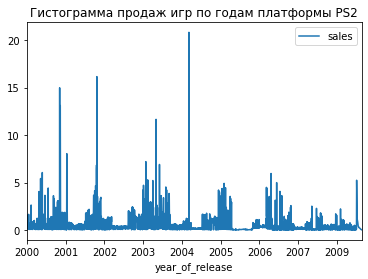

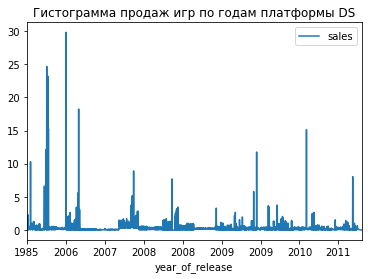

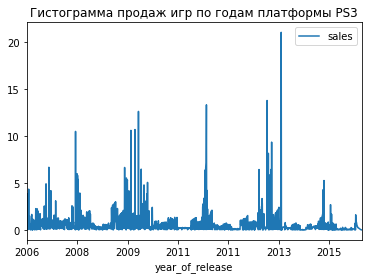

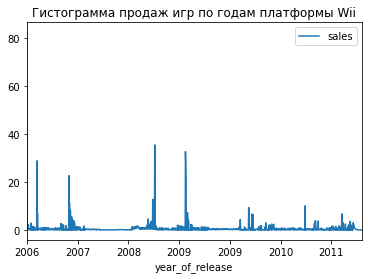

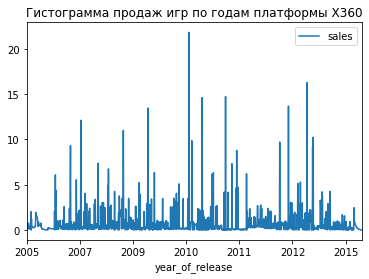

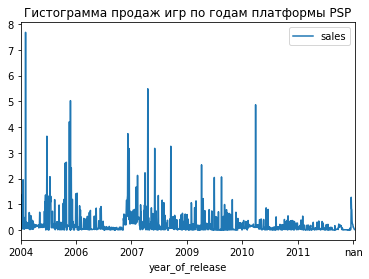

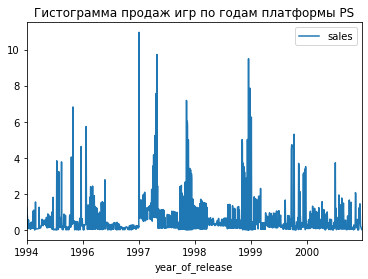

In [27]:
for p in platform_top.index:
    games_pd.loc[games_pd.platform == p]\
                .sort_values('year_of_release')\
                .plot(x='year_of_release', y='sales', title=f'Гистограмма продаж игр по годам платформы {p}')

Выберите топ 7 платформ и построили распределения

~ 7 лет составляет срок жизни платформ

In [28]:
# актуальный период 2012+
games_actual_pd = games_pd[games_pd['year_of_release'] >= 2012]

games_actual_pd.shape

(2886, 12)

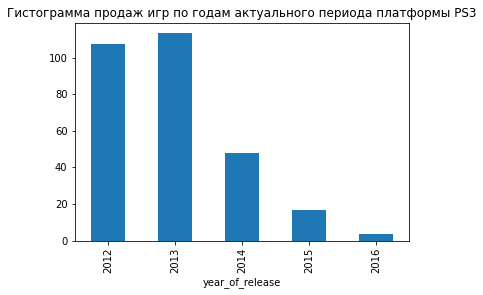

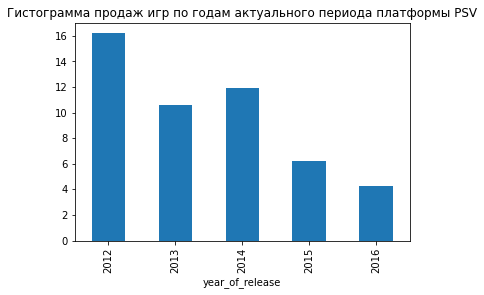

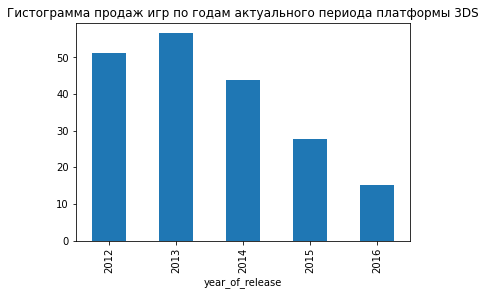

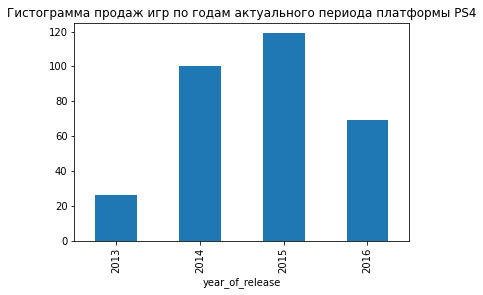

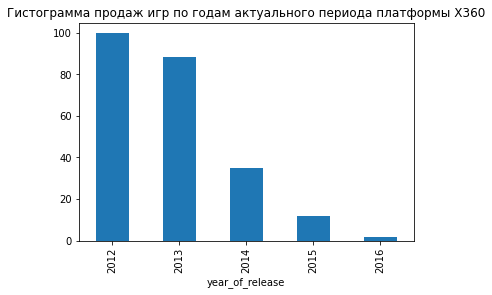

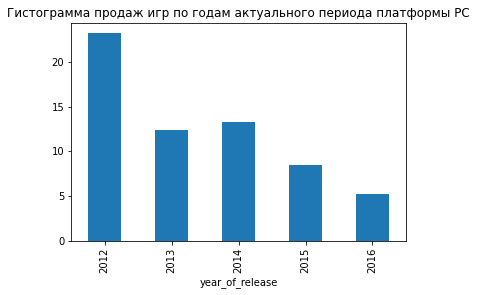

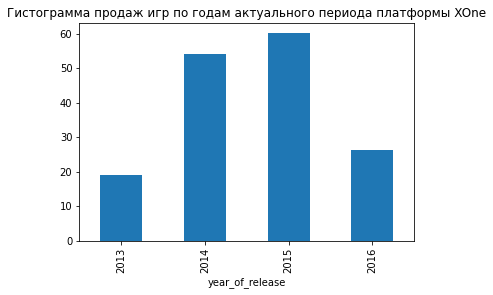

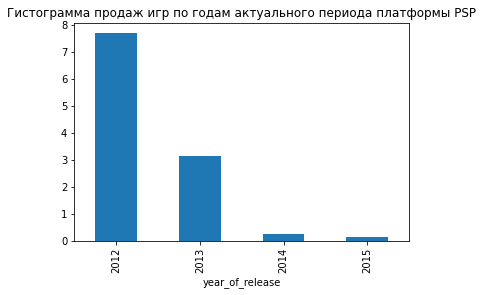

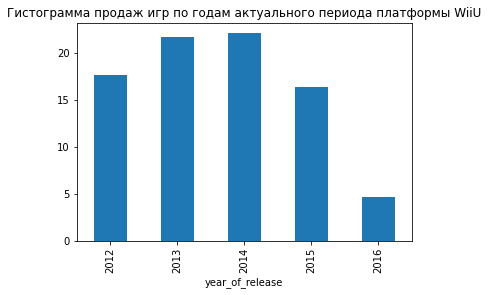

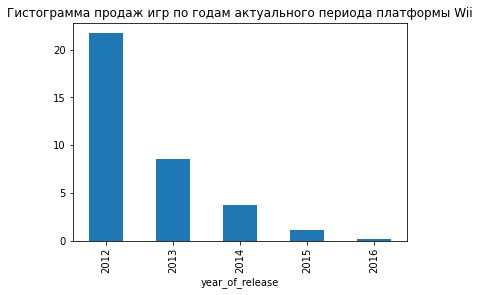

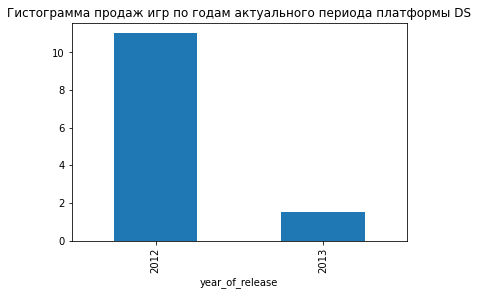

In [29]:
for p in games_actual_pd['platform'].value_counts().index:
    games_actual_pd.loc[games_actual_pd.platform == p]\
                    .sort_values('year_of_release')\
                    .groupby('year_of_release')['sales']\
                    .agg('sum')\
                    .plot(kind='bar', title=f'Гистограмма продаж игр по годам актуального периода платформы {p}')
    plt.show()

за актуальный период взяли период начиная с 2012 года

считаю, что именно этих данных будет достаточно для репрезентативности выборки

построили гистограммы по продаже игры в каждый из год актуального периода для каждой платформы

выделим лидеров по продажам:
- PS3
- PS4
- X360

также из графиков видим тренд к снижение продаж

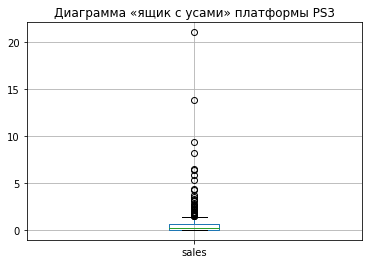

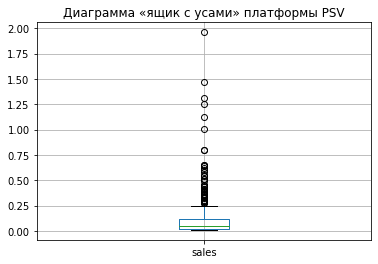

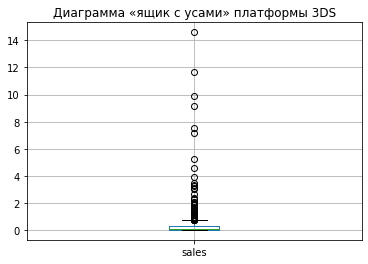

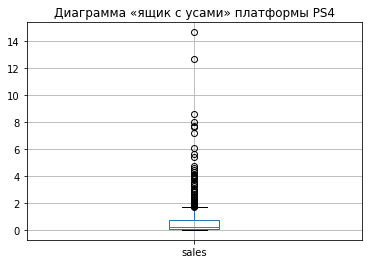

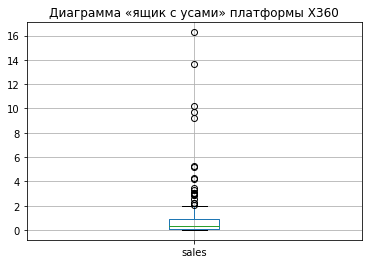

In [30]:
for p in games_actual_pd['platform'].value_counts().index[:5]:
    games_actual_pd.loc[games_actual_pd.platform == p].boxplot("sales").set_title(f'Диаграмма «ящик с усами» платформы {p}')
    plt.show()

Text(0.5, 1.0, 'Диаграмма «ящик с усами» топ 5 платформ')

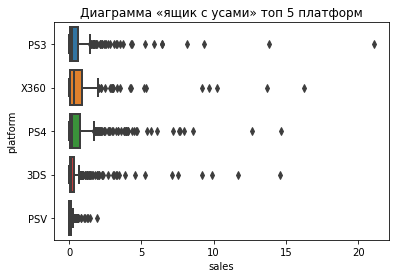

In [31]:
sns.boxplot(y='platform', 
            x='sales', 
            data=games_actual_pd.loc[games_actual_pd.platform.isin(games_actual_pd['platform'].value_counts().index[:5])], 
            linewidth=2).set_title('Диаграмма «ящик с усами» топ 5 платформ')

Построили boxplot-ы по топ5 платформам

из них видим квантили по каждой из платформ

также выделяются выбросы (>1.5IQR)

#### Анализ одной популярной платформы

In [32]:
games_actual_ps4 = games_actual_pd.query("platform == 'PS4'")
games_actual_ps4.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.00,7.50,E,14.63


correlation between critic_score and sales: 0.3387064530024634


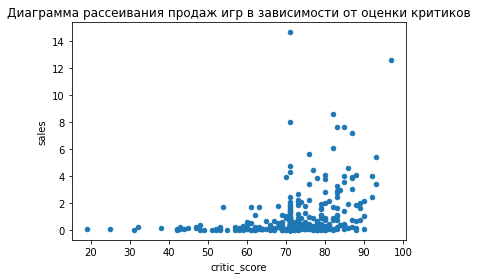

In [33]:
games_actual_ps4.plot(x='critic_score', y='sales', kind='scatter').set_title("Диаграмма рассеивания продаж игр в зависимости от оценки критиков")

print(f"correlation between critic_score and sales: {games_actual_ps4['critic_score'].corr(games_actual_ps4['sales'])}")

correlation between user_score and sales: -0.05793099098219044


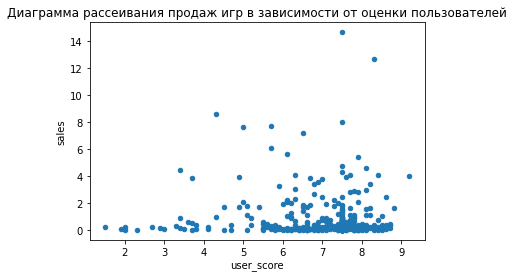

In [34]:
games_actual_ps4.plot(x='user_score', y='sales', kind='scatter').set_title("Диаграмма рассеивания продаж игр в зависимости от оценки пользователей")

print(f"correlation between user_score and sales: {games_actual_ps4['user_score'].corr(games_actual_ps4['sales'])}")

Text(0.5, 1.0, 'Тепловая карта корреляций фичей')

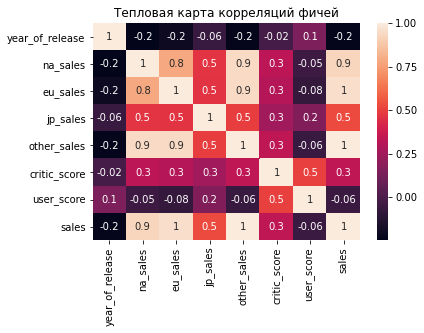

In [48]:
sns.heatmap(games_actual_ps4.corr(), annot = True, fmt='.001g').set_title("Тепловая карта корреляций фичей")

In [35]:
genre_stat = games_actual_pd.groupby('genre')['sales'].agg(['count', 'sum', 'median'])
genre_stat

,count,sum,median
genre,,,
Action,1031,441.12,0.12
Adventure,302,29.43,0.03
Fighting,109,44.49,0.13
Misc,192,85.04,0.12
Platform,85,61.00,0.21
Puzzle,28,4.89,0.04
Racing,115,53.50,0.14
Role-Playing,370,192.80,0.14
Shooter,235,304.73,0.44


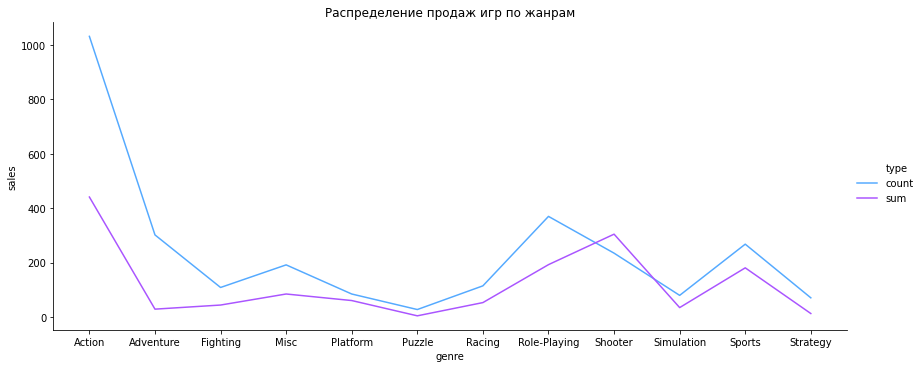

In [36]:
genre_stat_T = genre_stat.reset_index().melt('genre', var_name='type',  value_name='value')

sns.relplot(data=genre_stat_T.query("type != 'median'"), 
            x='genre', 
            y='value', 
            hue='type',
            height=5, 
            aspect=2.4, 
            kind="line",
            palette="cool").set(
                title="Распределение продаж игр по жанрам", 
                ylabel="sales",
                xlabel='genre')

Text(0.5, 1.0, 'Медианны значения продаж игр по жанрам')

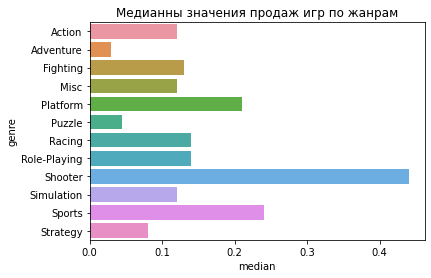

In [37]:
sns.barplot(data=genre_stat.reset_index(), y='genre', x='median').set_title('Медианны значения продаж игр по жанрам')

##### Вывод
- Произвели анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков
- Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами
- - Видим, что наибольшей коррекляцией с продажами обладают отзывы критиков (наибольшая концентрация в бакете 70-80)
- Произвели анализ продаж в разбивке жанров:
- - жанр, принесший больше всего денег от продаж и самый многочисленный по числу выпускаемых игр - Action
- - меньше всего игр в жанре Puzzle
- - в жанре Shooter самые дорогие игры

### портрет пользователя 

In [38]:
for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    print(reg)
    print((games_actual_pd.groupby('platform')[reg].agg(['sum']).reset_index().sort_values(by='sum', ascending=False).head(5)))
    print("\n")

na_sales
   platform    sum
9      X360 140.05
4       PS4 108.74
3       PS3 103.38
10     XOne  93.12
0       3DS  55.31


eu_sales
   platform    sum
4       PS4 141.09
3       PS3 106.86
9      X360  74.52
10     XOne  51.59
0       3DS  42.64


jp_sales
  platform   sum
0      3DS 87.79
3      PS3 35.29
6      PSV 21.04
4      PS4 15.96
8     WiiU 13.01




топ 5 платформ по продажам в каждом регионе немного различается:
- X360 - является самой популярной в NA, в то же время в Европе она только на 3 месте, а в Японии и вовсе отсутствует
- PS3 - во всех регионах занимает 2-3 места
- PS4 - популярна в NA и EU, а в Японии лишь на 4 месте
- 3DS - наоборот, очень популярна в Японии и менее в других регионах

In [39]:
for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    print(reg)
    print(games_actual_pd.groupby('genre')[reg].agg(['sum']).reset_index().sort_values(by='sum', ascending=False).head(5))
    print("\n")

na_sales
           genre    sum
0         Action 177.84
8        Shooter 144.77
10        Sports  81.53
7   Role-Playing  64.00
3           Misc  38.19


eu_sales
           genre    sum
0         Action 159.34
8        Shooter 113.47
10        Sports  69.09
7   Role-Playing  48.53
6         Racing  27.29


jp_sales
          genre   sum
7  Role-Playing 65.44
0        Action 52.80
3          Misc 12.86
9    Simulation 10.41
2      Fighting  9.44




топ 5 жанров по продажам в каждом регионе тоже немного различается:
- Action - является самым популярным в NA и в EU, в Японии также очень популярен, уступает лишь Role-Playing
- Shooter - очень популярны в NA и в EU, но не в Японии
- Role-Playing - самый популярный жанр в Японии, в других регионах на 4 месте

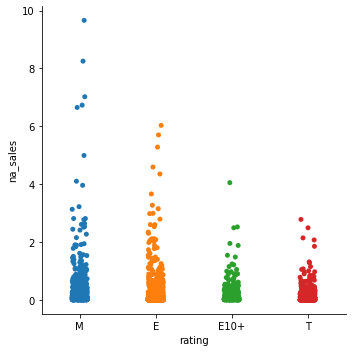

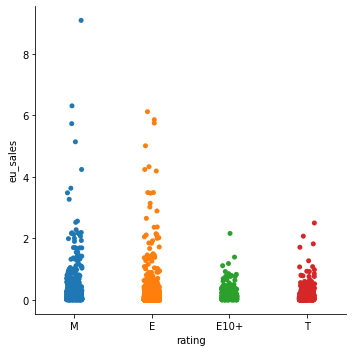

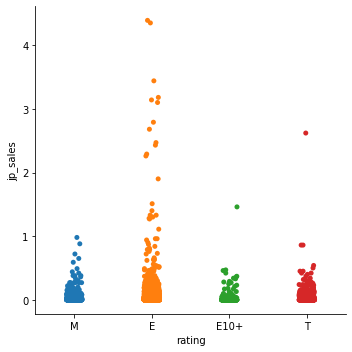

In [40]:
# влияние рейтинга ESRB на продажи
for reg in ['na_sales', 'eu_sales', 'jp_sales']:
    sns.catplot(x = 'rating',y = reg, data = games_actual_pd)
    plt.show()

##### Вывод
в NA и EU по рейтингам M, E самые большие продажи. Исходя из диаграммы рассеивания видим схожее поведение продаж по этим двум рейтингам в двух регионах

в Японии наибольшие продажи по рейтингу E

### Проверка гипотез

In [41]:
alpha = 0.05

print(f"Пороговое значение равно: {alpha}")

Пороговое значение равно: 0.05


#### Гипотеза 1
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [42]:
hyp_1_pv = stat.ttest_ind(games_actual_pd.query("platform == 'XOne'")['user_score'], 
                          games_actual_pd.query("platform == 'PC'")['user_score'], 
                          equal_var=True)
print('p-значение: ', hyp_1_pv.pvalue)

p-значение:  0.2430317192371797


In [43]:
if hyp_1_pv.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Не получилось отвергнуть нулевую гипотезу


##### Вывод
- За нулевую гипотезу (H0) было взято утверждение: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различны
- Пороговое значение alpha было задано 0.05

Была проведена проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, в результате которой мы не смогли отвергнуть нулевую гипотезу

#### Гипотеза 2
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [44]:
hyp_2_pv = stat.ttest_ind(games_actual_pd.query("genre == 'Action'")['user_score'], 
                          games_actual_pd.query("genre == 'Sports'")['user_score'], 
                          equal_var=True)
print('p-значение: ', hyp_2_pv.pvalue)

p-значение:  5.374000780072226e-37


In [45]:
if hyp_2_pv.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Отвергаем нулевую гипотезу


##### Вывод
- За нулевую гипотезу (H0) было взято утверждение: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports разные различны
- Пороговое значение alpha было задано 0.05

Была проведена проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, в результате которой мы отвергнули нулевую гипотезу

#### Вывод

В ходе проекта была проведены следующие аналитические задачи:
- предварительный анализ данных
- замену типов, наименований колонок
- заполнили пропуски
- посчитали суммарные продажи во всех регионах
- произвели анализ платформ, жанров
- посчита метрики: среднее количество, дисперсию и стандартное отклонение
- построили графики, описали распределения
- проверили две гипотезы

После каждого этапа проекта были оставлены более детальные выводы